In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold



# Data import


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Total Load - Day Ahead _ Actual_201601010000-201701010000.csv to Total Load - Day Ahead _ Actual_201601010000-201701010000.csv
Saving Total Load - Day Ahead _ Actual_201701010000-201801010000.csv to Total Load - Day Ahead _ Actual_201701010000-201801010000.csv
Saving Total Load - Day Ahead _ Actual_201801010000-201901010000.csv to Total Load - Day Ahead _ Actual_201801010000-201901010000.csv
Saving Total Load - Day Ahead _ Actual_201901010000-202001010000.csv to Total Load - Day Ahead _ Actual_201901010000-202001010000.csv
Saving Total Load - Day Ahead _ Actual_202001010000-202101010000.csv to Total Load - Day Ahead _ Actual_202001010000-202101010000.csv
Saving Total Load - Day Ahead _ Actual_202101010000-202201010000.csv to Total Load - Day Ahead _ Actual_202101010000-202201010000.csv


In [3]:
import io
df2016 = pd.read_csv(io.BytesIO(uploaded['Total Load - Day Ahead _ Actual_201601010000-201701010000.csv']))
df2017 = pd.read_csv(io.BytesIO(uploaded['Total Load - Day Ahead _ Actual_201701010000-201801010000.csv']))
df2018 = pd.read_csv(io.BytesIO(uploaded['Total Load - Day Ahead _ Actual_201801010000-201901010000.csv']))
df2019 = pd.read_csv(io.BytesIO(uploaded['Total Load - Day Ahead _ Actual_201901010000-202001010000.csv']))
df2020 = pd.read_csv(io.BytesIO(uploaded['Total Load - Day Ahead _ Actual_202001010000-202101010000.csv']))
df2021 = pd.read_csv(io.BytesIO(uploaded['Total Load - Day Ahead _ Actual_202101010000-202201010000.csv']))

# data.head()

In [4]:
df2018.shape

(8760, 3)

In [5]:
df2018


,Time (CET),Day-ahead Total Load Forecast [MW] - Spain (ES),Actual Total Load [MW] - Spain (ES)
0,01.01.2018 00:00 - 01.01.2018 01:00,23324,22779.0
1,01.01.2018 01:00 - 01.01.2018 02:00,22688,22009.0
2,01.01.2018 02:00 - 01.01.2018 03:00,21521,20589.0
3,01.01.2018 03:00 - 01.01.2018 04:00,20294,19547.0
4,01.01.2018 04:00 - 01.01.2018 05:00,19489,18871.0
...,...,...,...
8755,31.12.2018 19:00 - 31.12.2018 20:00,30619,30653.0
8756,31.12.2018 20:00 - 31.12.2018 21:00,29932,29735.0
8757,31.12.2018 21:00 - 31.12.2018 22:00,27903,28071.0
8758,31.12.2018 22:00 - 31.12.2018 23:00,25450,25801.0


# Data Preparation


In [6]:
# Check missing values and data size
for i in [df2016,df2017,df2018,df2019,df2020,df2021]:
    print(i.isnull().sum())
    print('Data size:',i.shape)
    print('-----------------')

Time (CET)                                         0
Day-ahead Total Load Forecast [MW] - Spain (ES)    0
Actual Total Load [MW] - Spain (ES)                5
dtype: int64
Data size: (8784, 3)
-----------------
Time (CET)                                         0
Day-ahead Total Load Forecast [MW] - Spain (ES)    0
Actual Total Load [MW] - Spain (ES)                2
dtype: int64
Data size: (8760, 3)
-----------------
Time (CET)                                         0
Day-ahead Total Load Forecast [MW] - Spain (ES)    0
Actual Total Load [MW] - Spain (ES)                2
dtype: int64
Data size: (8760, 3)
-----------------
Time (CET)                                         0
Day-ahead Total Load Forecast [MW] - Spain (ES)    0
Actual Total Load [MW] - Spain (ES)                0
dtype: int64
Data size: (8760, 3)
-----------------
Time (CET)                                         0
Day-ahead Total Load Forecast [MW] - Spain (ES)    0
Actual Total Load [MW] - Spain (ES)               

In [7]:
# Merges all datasets
df2016_2020 = pd.concat([df2016,df2017,df2018,df2019,df2020,df2021],axis=0)
df2016_2020 = df2016_2020.reset_index(drop=True)  
df2016_2020.shape

(52608, 3)

In [31]:
df2016_2020

,Time (CET),Day-ahead Total Load Forecast [MW] - Spain (ES),Actual Total Load [MW] - Spain (ES)
0,01.01.2016 00:00 - 01.01.2016 01:00,23273,22431
1,01.01.2016 01:00 - 01.01.2016 02:00,22495,21632
2,01.01.2016 02:00 - 01.01.2016 03:00,21272,20357
3,01.01.2016 03:00 - 01.01.2016 04:00,20022,19152
4,01.01.2016 04:00 - 01.01.2016 05:00,19148,18310
...,...,...,...
52603,31.12.2021 19:00 - 31.12.2021 20:00,-,-
52604,31.12.2021 20:00 - 31.12.2021 21:00,-,-
52605,31.12.2021 21:00 - 31.12.2021 22:00,-,-
52606,31.12.2021 22:00 - 31.12.2021 23:00,-,-


In [35]:
df2016_2020 = df2016_2020[:-1464]

In [36]:
df2016_2020

,Time (CET),Day-ahead Total Load Forecast [MW] - Spain (ES),Actual Total Load [MW] - Spain (ES)
0,01.01.2016 00:00 - 01.01.2016 01:00,23273,22431
1,01.01.2016 01:00 - 01.01.2016 02:00,22495,21632
2,01.01.2016 02:00 - 01.01.2016 03:00,21272,20357
3,01.01.2016 03:00 - 01.01.2016 04:00,20022,19152
4,01.01.2016 04:00 - 01.01.2016 05:00,19148,18310
...,...,...,...
51139,31.10.2021 19:00 - 31.10.2021 20:00,26163,25330
51140,31.10.2021 20:00 - 31.10.2021 21:00,26686,25562
51141,31.10.2021 21:00 - 31.10.2021 22:00,26098,25252
51142,31.10.2021 22:00 - 31.10.2021 23:00,24607,24066


In [37]:
# Creates Hour, Day, Month, Year and Date variables
temp_split = df2016_2020['Time (CET)'].str.split(" ", expand = True)

day_month_year = temp_split[0].str.split(".", expand = True)
day_month_year.rename(columns={0:'Day',1:'Month',2:'Year'}, inplace=True)

hour = temp_split[1].str.split(":", expand = True)
hour.rename(columns={0:'Hour'}, inplace=True)

timeframe = pd.concat([hour['Hour'],day_month_year],axis=1)
timeframe['Date'] = timeframe['Year']+'-'+timeframe['Month']+'-'+timeframe['Day']
timeframe = timeframe.reset_index(drop=True)
timeframe.head()

,Hour,Day,Month,Year,Date
0,00,01,01,2016,2016-01-01
1,01,01,01,2016,2016-01-01
2,02,01,01,2016,2016-01-01
3,03,01,01,2016,2016-01-01
4,04,01,01,2016,2016-01-01


In [38]:
# Creates time data in Madrid
date = pd.DataFrame(pd.date_range(start='01/01/2016 00:00:00', end='10/31/2021 23:00:00',
                                  freq='H', tz='Europe/Madrid'))
date = date.astype(str)
date = date[0].str.split(' ', expand = True)
date.head()

,0,1
0,2016-01-01,00:00:00+01:00
1,2016-01-01,01:00:00+01:00
2,2016-01-01,02:00:00+01:00
3,2016-01-01,03:00:00+01:00
4,2016-01-01,04:00:00+01:00


In [39]:
# Gets Day of week variable
# 0: Monday, 1: Tueday ... 6: Sunday
day_of_week = pd.date_range(start='01/01/2016 00:00:00', end='10/31/2021 23:00:00',
                            freq='H', tz='Europe/Madrid').to_series().dt.dayofweek
day_of_week = day_of_week.values.tolist()
day_of_week = pd.to_numeric(day_of_week, errors='coerce')
day_of_week = pd.DataFrame(day_of_week, columns = ["Day of week"])
day_of_week.head()

,Day of week
0,4
1,4
2,4
3,4
4,4


In [40]:
date = pd.concat([date[0],day_of_week],axis=1)
date.rename(columns={0:'Date'}, inplace=True)
date.head()

,Date,Day of week
0,2016-01-01,4
1,2016-01-01,4
2,2016-01-01,4
3,2016-01-01,4
4,2016-01-01,4


In [41]:
# Gets public holidaies in Spain
import holidays
def get_holidays(year):
    holidays_date = []
    for date in sorted(holidays.EE(years=year).items()):
        holidays_date.append(str(date[0]))
    return holidays_date

year = [2016,2017,2018,2019,2020,2021]
holidays_list = get_holidays(year)
holidays_list = '|'.join(holidays_list)
holidays = date['Date'].str.contains(holidays_list)
holidays *= 1 # True = 1, False = 0
holidays=holidays.rename("Public_holidays")
df_date = pd.concat([date,holidays],axis=1)
df_date.head()

,Date,Day of week,Public_holidays
0,2016-01-01,4,1
1,2016-01-01,4,1
2,2016-01-01,4,1
3,2016-01-01,4,1
4,2016-01-01,4,1


In [42]:
df_date

,Date,Day of week,Public_holidays
0,2016-01-01,4,1
1,2016-01-01,4,1
2,2016-01-01,4,1
3,2016-01-01,4,1
4,2016-01-01,4,1
...,...,...,...
51139,2021-10-31,6,0
51140,2021-10-31,6,0
51141,2021-10-31,6,0
51142,2021-10-31,6,0


In [43]:
final_date = pd.concat([timeframe,df_date],axis=1)
final_date.head()

,Hour,Day,Month,Year,Date,Date,Day of week,Public_holidays
0,00,01,01,2016,2016-01-01,2016-01-01,4,1
1,01,01,01,2016,2016-01-01,2016-01-01,4,1
2,02,01,01,2016,2016-01-01,2016-01-01,4,1
3,03,01,01,2016,2016-01-01,2016-01-01,4,1
4,04,01,01,2016,2016-01-01,2016-01-01,4,1


In [44]:
final_date.tail()

,Hour,Day,Month,Year,Date,Date,Day of week,Public_holidays
51139,19,31,10,2021,2021-10-31,2021-10-31,6,0
51140,20,31,10,2021,2021-10-31,2021-10-31,6,0
51141,21,31,10,2021,2021-10-31,2021-10-31,6,0
51142,22,31,10,2021,2021-10-31,2021-10-31,6,0
51143,23,31,10,2021,2021-10-31,2021-10-31,6,0


In [45]:
final_df = pd.concat([final_date[['Hour','Day','Day of week','Public_holidays','Month','Year']],
                      df2016_2020['Actual Total Load [MW] - Spain (ES)']],axis=1)

final_df.head()

,Hour,Day,Day of week,Public_holidays,Month,Year,Actual Total Load [MW] - Spain (ES)
0,00,01,4,1,01,2016,22431
1,01,01,4,1,01,2016,21632
2,02,01,4,1,01,2016,20357
3,03,01,4,1,01,2016,19152
4,04,01,4,1,01,2016,18310


In [46]:
final_df.tail()

,Hour,Day,Day of week,Public_holidays,Month,Year,Actual Total Load [MW] - Spain (ES)
51139,19,31,6,0,10,2021,25330
51140,20,31,6,0,10,2021,25562
51141,21,31,6,0,10,2021,25252
51142,22,31,6,0,10,2021,24066
51143,23,31,6,0,10,2021,22691


In [47]:
final_df.isnull().sum()

Hour                                   0
Day                                    0
Day of week                            0
Public_holidays                        0
Month                                  0
Year                                   0
Actual Total Load [MW] - Spain (ES)    9
dtype: int64

In [55]:
final_df

,Hour,Day,Day of week,Public_holidays,Month,Year,Actual Total Load [MW] - Spain (ES)
0,00,01,4,1,01,2016,22431
1,01,01,4,1,01,2016,21632
2,02,01,4,1,01,2016,20357
3,03,01,4,1,01,2016,19152
4,04,01,4,1,01,2016,18310
...,...,...,...,...,...,...,...
51139,19,31,6,0,10,2021,25330
51140,20,31,6,0,10,2021,25562
51141,21,31,6,0,10,2021,25252
51142,22,31,6,0,10,2021,24066


In [56]:
final_df_drop_nan = final_df.fillna(method ='bfill')
final_df_drop_nan.shape

(51144, 7)

In [50]:
# final_df_drop_nan = final_df_drop_nan[:-1464]

In [57]:
final_df_drop_nan

,Hour,Day,Day of week,Public_holidays,Month,Year,Actual Total Load [MW] - Spain (ES)
0,00,01,4,1,01,2016,22431
1,01,01,4,1,01,2016,21632
2,02,01,4,1,01,2016,20357
3,03,01,4,1,01,2016,19152
4,04,01,4,1,01,2016,18310
...,...,...,...,...,...,...,...
51139,19,31,6,0,10,2021,25330
51140,20,31,6,0,10,2021,25562
51141,21,31,6,0,10,2021,25252
51142,22,31,6,0,10,2021,24066


In [58]:
final_df_drop_nan.dtypes

Hour                                   object
Day                                    object
Day of week                             int64
Public_holidays                         int64
Month                                  object
Year                                   object
Actual Total Load [MW] - Spain (ES)    object
dtype: object

In [59]:
final_df_drop_nan

,Hour,Day,Day of week,Public_holidays,Month,Year,Actual Total Load [MW] - Spain (ES)
0,00,01,4,1,01,2016,22431
1,01,01,4,1,01,2016,21632
2,02,01,4,1,01,2016,20357
3,03,01,4,1,01,2016,19152
4,04,01,4,1,01,2016,18310
...,...,...,...,...,...,...,...
51139,19,31,6,0,10,2021,25330
51140,20,31,6,0,10,2021,25562
51141,21,31,6,0,10,2021,25252
51142,22,31,6,0,10,2021,24066


In [60]:
# Transforms to numerical values
final_df_drop_nan['Hour'] = final_df_drop_nan['Hour'].astype(int)
final_df_drop_nan['Day'] = final_df_drop_nan['Day'].astype(int)
final_df_drop_nan['Month'] = final_df_drop_nan['Month'].astype(int)
final_df_drop_nan['Year'] = final_df_drop_nan['Year'].astype(int)

In [61]:
final_df_drop_nan['Actual Total Load [MW] - Spain (ES)'] = final_df_drop_nan['Actual Total Load [MW] - Spain (ES)'].astype(float)

In [62]:
final_df_drop_nan.dtypes

Hour                                     int64
Day                                      int64
Day of week                              int64
Public_holidays                          int64
Month                                    int64
Year                                     int64
Actual Total Load [MW] - Spain (ES)    float64
dtype: object

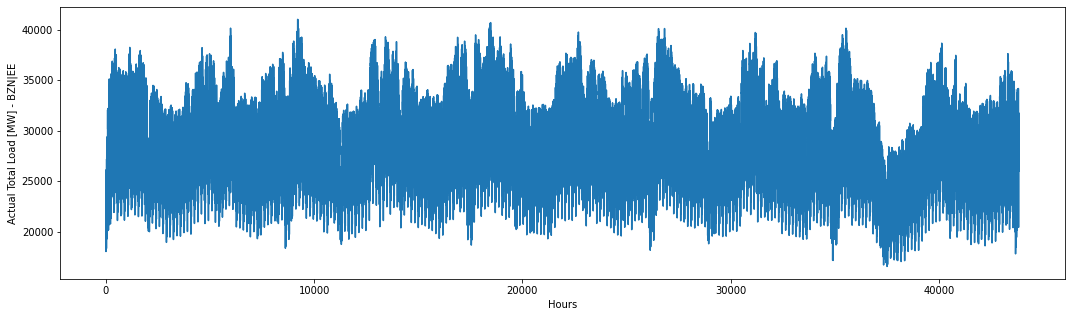

# LSTM


In [71]:
# Normalization of 'Actual Total Load [MW] - BZN|EE''
lstm_data = final_df_drop_nan.copy()
max_x = lstm_data['Actual Total Load [MW] - Spain (ES)'].max()
min_x = lstm_data['Actual Total Load [MW] - Spain (ES)'].min()
lstm_data['Actual Total Load [MW] - Spain (ES)'] = (lstm_data['Actual Total Load [MW] - Spain (ES)'] - min_x) / (max_x - min_x)
# lstm_data['Actual Total Load [MW] - BZN|EE'] = lstm_data['Actual Total Load [MW] - BZN|EE']*(max_x - min_x) + min_x # To reverse
lstm_data.describe()

,Hour,Day,Day of week,Public_holidays,Month,Year,Actual Total Load [MW] - Spain (ES)
count,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000
mean,11.500000,15.732129,3.002816,0.032360,6.379986,2018.427968,0.466457
std,6.922254,8.801404,2.000252,0.176955,3.390752,1.678502,0.181226
min,0.000000,1.000000,0.000000,0.000000,1.000000,2016.000000,0.000000
25%,5.750000,8.000000,1.000000,0.000000,3.000000,2017.000000,0.315809
50%,11.500000,16.000000,3.000000,0.000000,6.000000,2018.000000,0.469181
75%,17.250000,23.000000,5.000000,0.000000,9.000000,2020.000000,0.605266
max,23.000000,31.000000,6.000000,1.000000,12.000000,2021.000000,1.000000


In [97]:
n_prev = 720

train = lstm_data[(lstm_data['Year']!=2021)]
test = lstm_data[(lstm_data['Year']==2021)]

In [98]:
test

,Hour,Day,Day of week,Public_holidays,Month,Year,Actual Total Load [MW] - Spain (ES)
43848,0,1,4,1,1,2021,0.319631
43849,1,1,4,1,1,2021,0.272489
43850,2,1,4,1,1,2021,0.188411
43851,3,1,4,1,1,2021,0.120378
43852,4,1,4,1,1,2021,0.086501
...,...,...,...,...,...,...,...
51139,19,31,6,0,10,2021,0.347710
51140,20,31,6,0,10,2021,0.356924
51141,21,31,6,0,10,2021,0.344613
51142,22,31,6,0,10,2021,0.297510


In [73]:
lstm_train = train[['Actual Total Load [MW] - Spain (ES)']]
lstm_test = test[['Actual Total Load [MW] - Spain (ES)']]

In [74]:
lstm_train

,Actual Total Load [MW] - Spain (ES)
0,0.232575
1,0.200842
2,0.150205
3,0.102347
4,0.068907
...,...
43843,0.602844
43844,0.581516
43845,0.537194
43846,0.431788


In [75]:
# convert an array of values into a dataset matrix
def load_data(data, n_prev):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev])
        docY.append(data.iloc[i+n_prev])
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY

In [76]:
trainX, trainY = load_data(lstm_train, n_prev)
testX, testY = load_data(lstm_test, n_prev)

In [93]:
len(testY)

6576

In [77]:
print(trainX.shape,trainY.shape,testX.shape,testY.shape)

(43128, 720, 1) (43128, 1) (6576, 720, 1) (6576, 1)


In [78]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from keras.layers import Dropout

In [79]:
# Creates and fit the LSTM network
length_of_sequences = trainX.shape[1]
hidden_neurons = 2
in_out_neurons = 1

model = Sequential()
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(1))  
model.add(Activation("linear")) 
 
model.compile(loss="mean_squared_error", optimizer="adam")
history = model.fit(trainX, trainY, batch_size=20, epochs=3, validation_split=0.2)

Epoch 1/3
1726/1726 [==============================] - 882s 510ms/step - loss: 0.0332 - val_loss: 0.0110
Epoch 2/3
1726/1726 [==============================] - 878s 509ms/step - loss: 0.0116 - val_loss: 0.0052
Epoch 3/3
1726/1726 [==============================] - 873s 506ms/step - loss: 0.0072 - val_loss: 0.0026


In [99]:
# checking the learning
predy = model.predict(trainX)
trainY_reverse = trainY*(max_x - min_x) + min_x # To reverse
predy_reverse = predy*(max_x - min_x) + min_x # To reverse

# Visualising th learning
plt.figure(figsize=(18,5))
plt.plot(trainY_reverse)
plt.plot(predy_reverse)
# plt.plot(predY_reverse - testY_reverse)
plt.xlabel("Hours in 2020")
plt.ylabel("Error [actual -- predict load]")
# plt.ylim([-450, 450])
plt.show()

ValueError: ignored

In [80]:
# Evaluation
predY = model.predict(testX)
r2_score_result = r2_score(testY, predY)
adjusted_r2_score_result = 1 - (1-r2_score_result)*(len(testY)-1)/(len(testY)-testX.shape[1]-1)
print('R^2_adj:',round(adjusted_r2_score_result,3))

R^2_adj: 0.909


In [81]:
# Rverse load values from Normalization
testY_reverse = testY*(max_x - min_x) + min_x # To reverse
predY_reverse = predY*(max_x - min_x) + min_x # To reverse

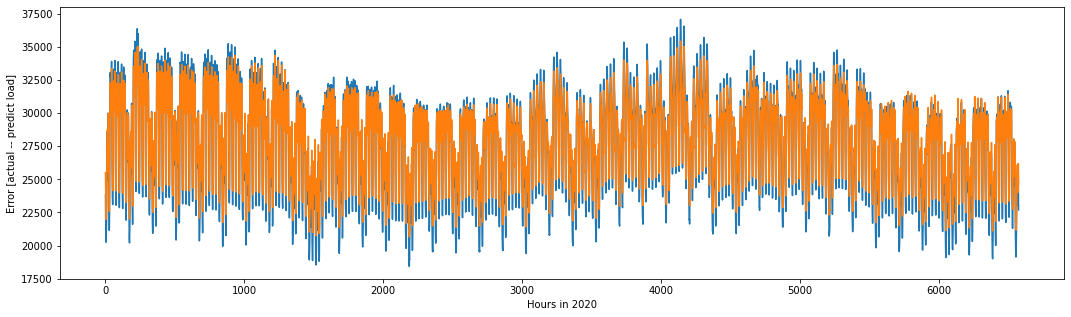

In [82]:
# visualizing the validation

plt.figure(figsize=(18,5))
plt.plot(testY_reverse)
plt.plot(predY_reverse)
# plt.plot(predY_reverse - testY_reverse)
plt.xlabel("Hours in 2020")
plt.ylabel("Error [actual -- predict load]")
# plt.ylim([-450, 450])
plt.show()

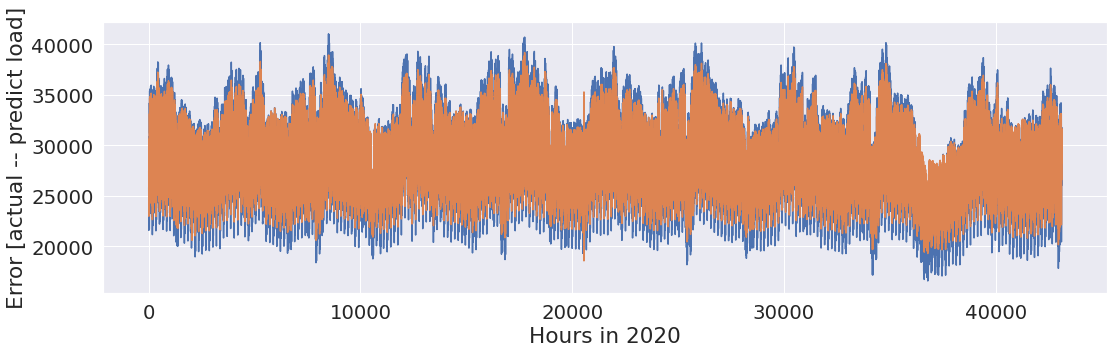

# Results


In [113]:
prev_forcast = predy_reverse[-720:]
prev_values = trainY_reverse[-720:]
df_prev_forecast = pd.DataFrame(data=prev_forcast.flatten(),  columns=['prev_forcast'])
df_prev_forecast['prev_values']= prev_values

print(df_prev_forecast)

In [115]:
from google.colab import files
df_prev_forecast.to_csv('pre_load_validation_forecast.csv') 
files.download('pre_load_validation_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
df_load_forecast = pd.DataFrame(data=predY_reverse.flatten(),  columns=['load_forecast'])
df_load_forecast['testY_reverse']= testY_reverse
print(df_load_forecast)

      load_forecast
0      25514.066406
1      24179.246094
2      23146.488281
3      22509.876953
4      22091.531250
...             ...
6571   25790.898438
6572   26181.886719
6573   26208.970703
6574   25787.125000
6575   24596.894531

[6576 rows x 1 columns]


In [90]:
from google.colab import files
df_load_forecast.to_csv('load_validation_forecast.csv') 
files.download('load_validation_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Conclusion